In [2]:
import xarray as xr
import pandas as pd
import numpy as np
from cast_to_xarray import *

In [3]:
# load in the Winkler oxygen data
# problem: don't have info to match trip depth from seabird files
DO_winklerpd = pd.read_csv('../O2calib/Cruise2Winkler.csv')

# conver to xarray
DO_winkler = DO_winklerpd.set_index('Station').to_xarray()

In [4]:
# load the CTD data

data_dir = 'data_cruise2'

castRACExr = cast_to_xarray(data_dir+'/race_loop_filter_teos10_bin.cnv', 'Race')
castWFxr = cast_to_xarray(data_dir+'/WF_loop_filter_teos10_bin.cnv', 'WF')
cast2xr = cast_to_xarray(data_dir+'/station2_loop_filter_teos10_bin.cnv', '2')
cast6xr = cast_to_xarray(data_dir+'/station6_loop_filter_teos10_bin.cnv', '6')
cast7xr = cast_to_xarray(data_dir+'/station7_loop_filter_teos10_bin.cnv', '7')
cast8xr = cast_to_xarray(data_dir+'/station8_loop_filter_teos10_bin.cnv', '8')
cast9xr = cast_to_xarray(data_dir+'/slope_loop_filter_teos10_bin.cnv', '9')

# Function to plot CTD and bottle profile

In [5]:
def compare_oxygen(CTDxarray, StationName):
    plt.rcParams.update({'font.size': 16})
    ylim = (CTDxarray.depth.values.max(),0)
    plt.figure(figsize=(6,10))
    CTDxarray.plot.scatter('oxygen','depth')
    DO_winkler.sel(Station=StationName).plot.scatter('Oxygen', 'Depth')
    plt.ylim(*ylim)
    plt.legend(['CTD', 'Winkler'])

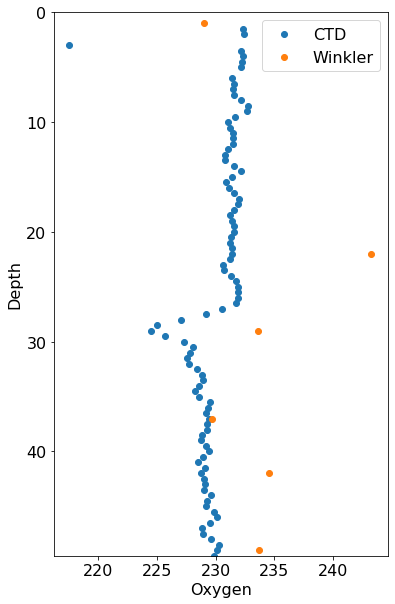

In [6]:
compare_oxygen(castRACExr, 'Race')

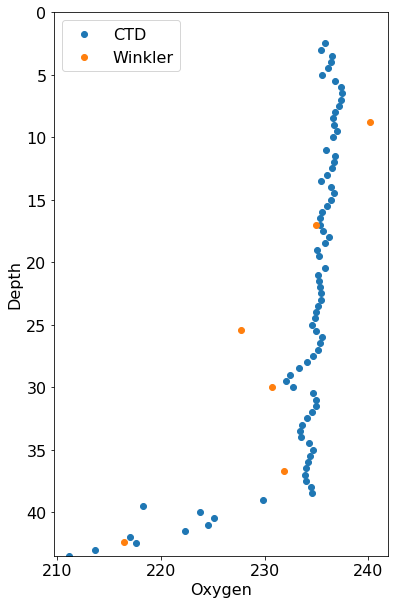

In [7]:
compare_oxygen(castWFxr, 'WF')

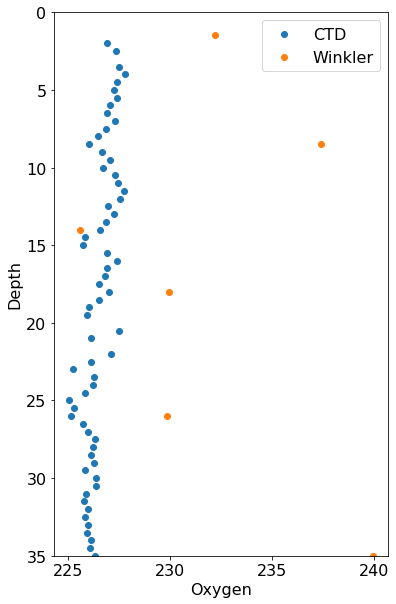

In [8]:
compare_oxygen(cast2xr, '2')

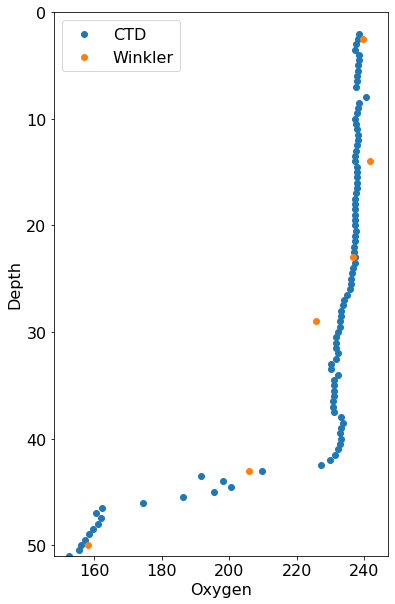

In [9]:
compare_oxygen(cast6xr, '6')

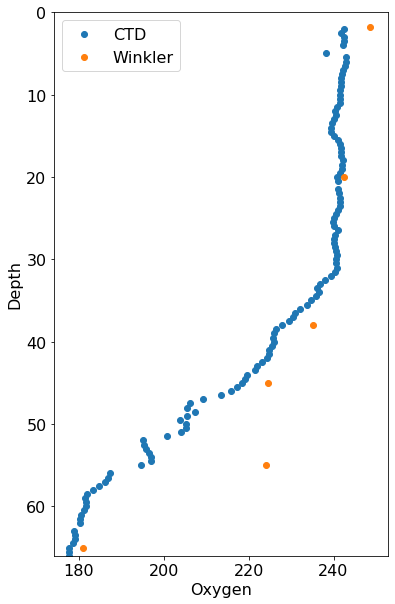

In [10]:
compare_oxygen(cast7xr, '7')

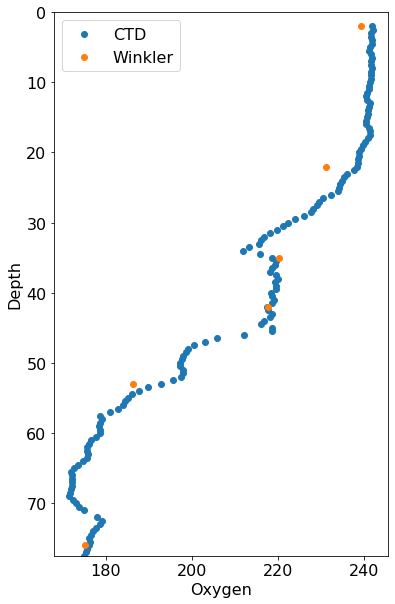

In [11]:
compare_oxygen(cast8xr, '8')

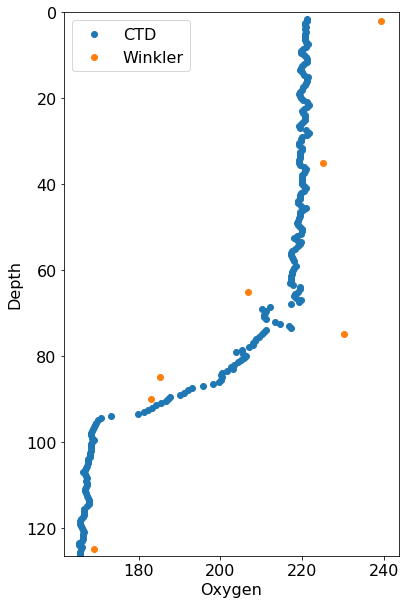

In [12]:
compare_oxygen(cast9xr, '9')

# Plot CTD vs. Winkler

## Function to extract CTD data at nearest depth point

In [13]:
# make a function that extracts the CTD data at the depth of the Winkler data
def extract_CTD(CTDxarray, StationName):
    winklerdepths = DO_winkler.sel(Station=StationName).Depth
    
    CTDvals = []

    for i in range(len(winklerdepths)):
        CTDval = CTDxarray.sel(depth=winklerdepths[i], method='nearest').oxygen.values 
        CTDvals.append(CTDval)
        
    return CTDvals

Text(0, 0.5, 'CTD')

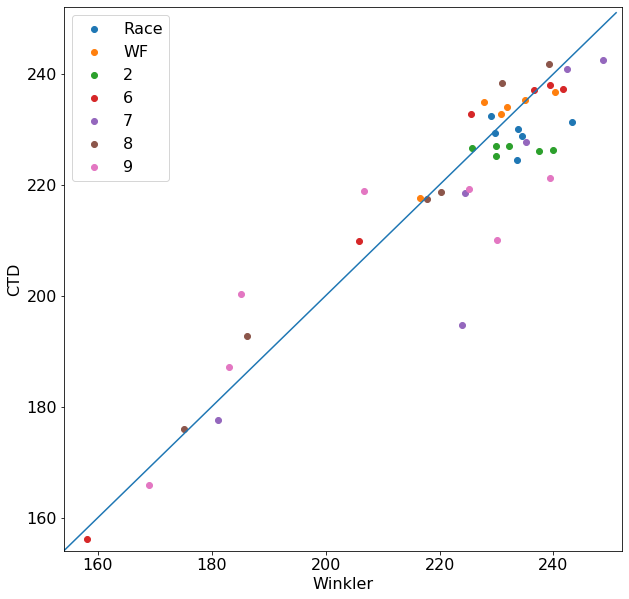

In [14]:
plt.figure(figsize=(10,10))

plt.scatter(DO_winkler.sel(Station='Race').Oxygen.values, extract_CTD(castRACExr, 'Race'), label='Race')
plt.scatter(DO_winkler.sel(Station='WF').Oxygen.values, extract_CTD(castWFxr, 'WF'), label='WF')
plt.scatter(DO_winkler.sel(Station='2').Oxygen.values, extract_CTD(cast2xr, '2'), label='2')
plt.scatter(DO_winkler.sel(Station='6').Oxygen.values, extract_CTD(cast6xr, '6'), label='6')
plt.scatter(DO_winkler.sel(Station='7').Oxygen.values, extract_CTD(cast7xr, '7'), label='7')
plt.scatter(DO_winkler.sel(Station='8').Oxygen.values, extract_CTD(cast8xr, '8'), label='8')
plt.scatter(DO_winkler.sel(Station='9').Oxygen.values, extract_CTD(cast9xr, '9'), label='9')

datamin = 154
datamax = 252

x=np.arange(datamin, datamax, 1)
plt.plot(x, x)

plt.xlim([datamin, datamax])
plt.ylim([datamin, datamax])

plt.legend()
plt.xlabel('Winkler')
plt.ylabel('CTD')

In [15]:
# calculate the R squared for one station

correlation_matrix = np.corrcoef(DO_winkler.sel(Station='9').Oxygen.values, CTD9)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

r_squared

NameError: name 'CTD9' is not defined

# NEXT: combine the values to calculate the total R squared

In [18]:
cruise2winkler = DO_winkler.sel(Station='Race').Oxygen.values
cruise2winkler.append(DO_winkler.sel(Station='WF').Oxygen.values)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [19]:
cruise2winkler = np.concatenate(DO_winkler.sel(Station='Race').Oxygen.values, DO_winkler.sel(Station='WF').Oxygen.values)

TypeError: only integer scalar arrays can be converted to a scalar index